# Demo on `Bayesian Optimization`

> referring to: https://github.com/SheffieldML/GPy/issues/728
`numpy` in latest version could cause plot mismatch error, do this before everything starts.

```bash
python -m pip install --upgrade --force-reinstall numpy==1.15.4 GPy scipy
```

In [1]:
%matplotlib inline
import GPyOpt
import GPy
import matplotlib.pyplot as plt

#from matplotlib import animation, rc
from IPython.display import HTML

In this demo, we assume the latent function we are going to optimizing is the `Forrester function`:

$$f(x)=(6x−2)^{2}sin(12x−4)$$
defined on the interval $[0,1]$.

The minimum of this function is located at $x_{min}=0.78$.
For the reason the `Forrester function` is part of the benchmark of functions of `GPyOpt`. We could simply instantiate it from `GPyOpt`.

In [2]:
f_true= GPyOpt.objective_examples.experiments1d.forrester()          # noisy version
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,1)}]  # problem constraints 

We could plot the `Forrester function`.

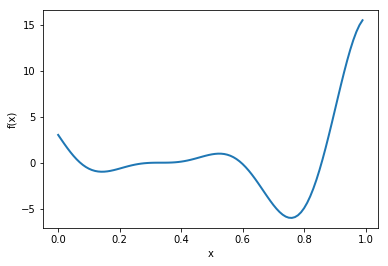

In [3]:
f_true.plot()

Below is a demo using Bayersian Optimization to find minimal arguments of `Forrester function`:

In [4]:
myBopt = GPyOpt.methods.BayesianOptimization(
    f=f_true.f,         # function to optimize       
    domain=bounds,      # box-constraints of the problem
    acquisition_type='EI',
    exact_feval = True  # Selects the Expected improvement
)

In [5]:
# Run the optimization
max_iter = 15     # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the last two observations

myBopt.run_optimization(max_iter, max_time, eps) 

> Below is acquisition function in last iteration.

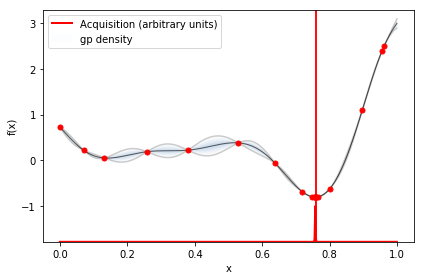

In [6]:
myBopt.plot_acquisition()

> we could see the distance of E-E in each iteration

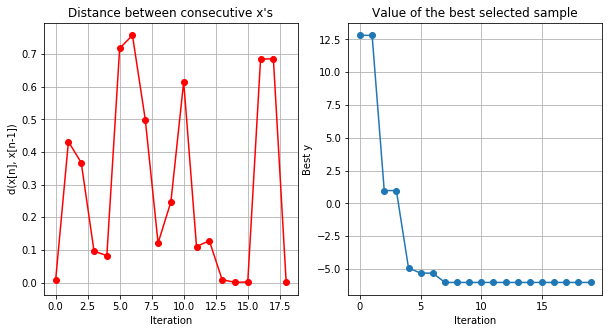

In [7]:
myBopt.plot_convergence()

> Let's see how it goes per iteration

In [8]:
import numpy as np

def demo_acquisition(
    acquisition_type='EI',
    max_iter = 15):
    X_init = np.array([[0.], [0.5] ,[1.05]])
    Y_init = f_true.f(X_init)
    max_iter = max_iter
    current_iter = 0
    X_step = X_init
    Y_step = Y_init
    while current_iter < max_iter:
        print ("iteration ", current_iter)
        bo_step = GPyOpt.methods.BayesianOptimization(
            f=f_true.f,
            domain=bounds,
            X=X_step,
            Y=Y_step,
            acquisition_type=acquisition_type,
            exact_feval = True
        )
        x_next = bo_step.suggest_next_locations()

        y_next = f_true.f(x_next) # query the next computing

        X_step = np.vstack((X_step, x_next))
        Y_step = np.vstack((Y_step, y_next))

        bo_step.plot_acquisition()
        current_iter += 1


iteration  0


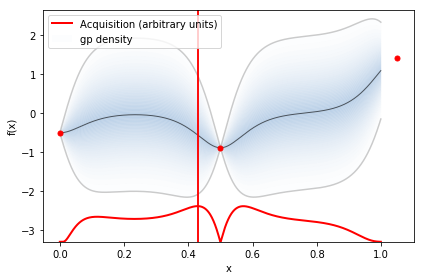

iteration  1


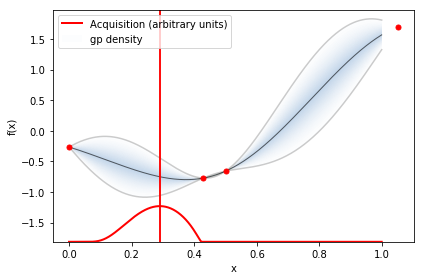

iteration  2


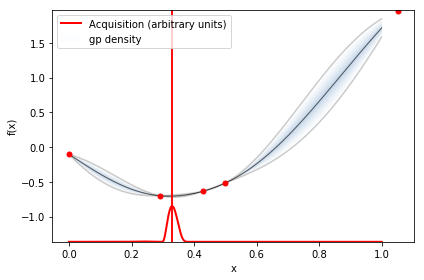

iteration  3


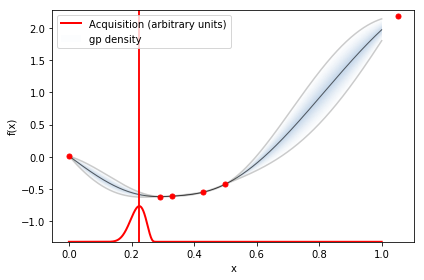

iteration  4


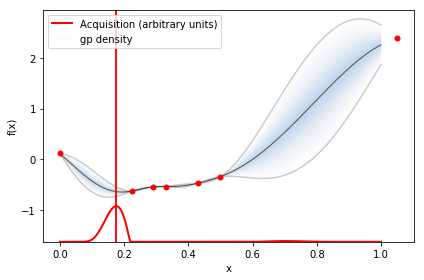

iteration  5


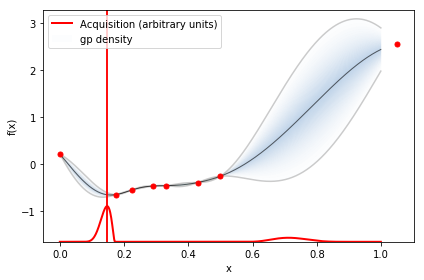

iteration  6


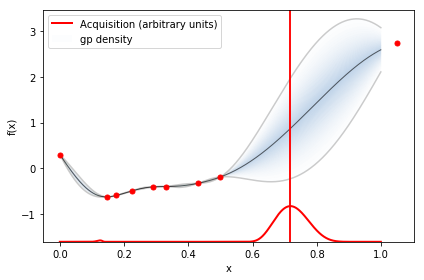

iteration  7


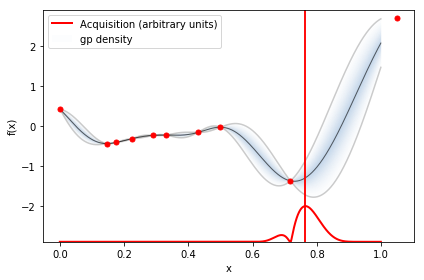

iteration  8


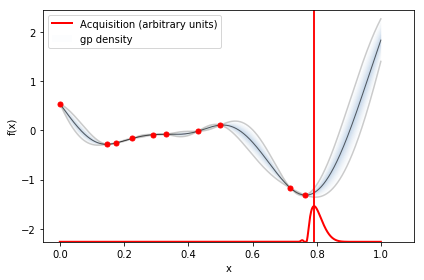

iteration  9


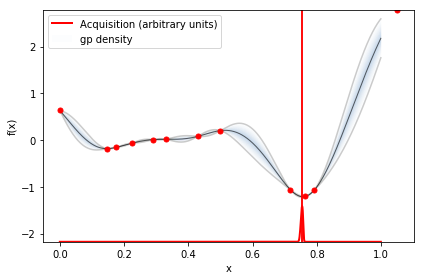

iteration  10


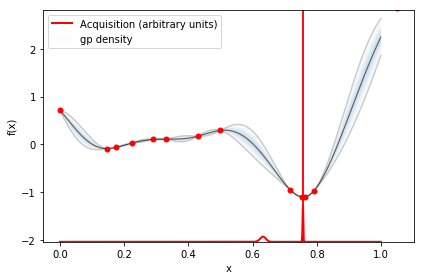

iteration  11


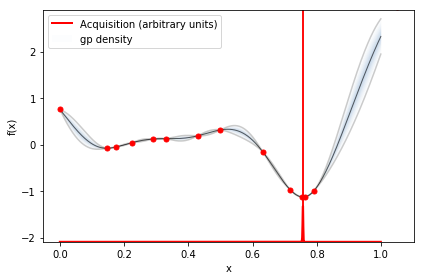

iteration  12


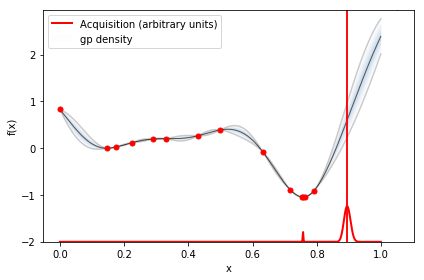

iteration  13


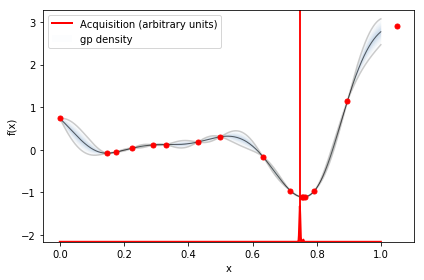

iteration  14


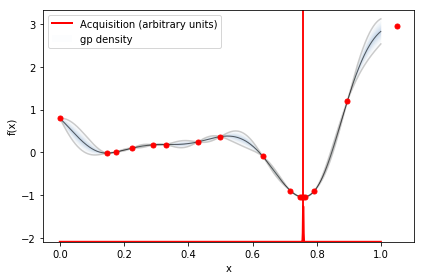

In [9]:
demo_acquisition(acquisition_type='EI')

supported `acuisition_type` by GPyOpt referring to:https://gpyopt.readthedocs.io/en/latest/GPyOpt.methods.html

```
Acquisition_type:

  type of acquisition function to use
  - ‘EI’, expected improvement.
  - ‘EI_MCMC’, integrated expected improvement (requires GP_MCMC model).
  - ‘MPI’, maximum probability of improvement.
  - ‘MPI_MCMC’, maximum probability of improvement (requires GP_MCMC model).
  - ‘LCB’, GP-Lower confidence bound.
  - ‘LCB_MCMC’, integrated GP-Lower confidence bound (requires GP_MCMC model).
```

iteration  0


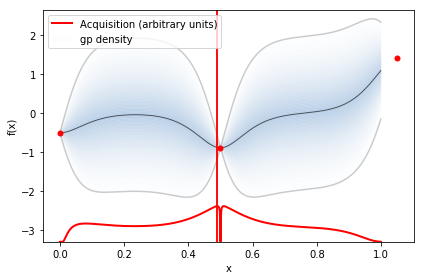

iteration  1


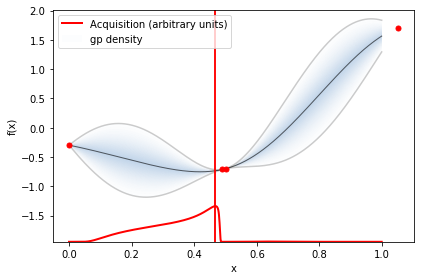

iteration  2


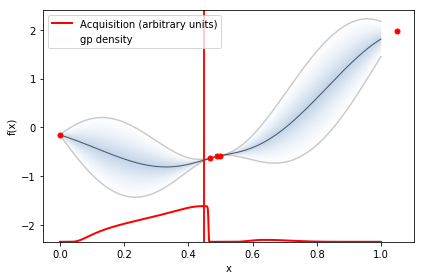

iteration  3


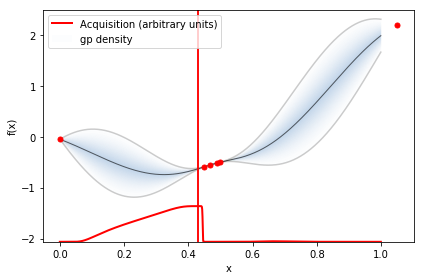

iteration  4


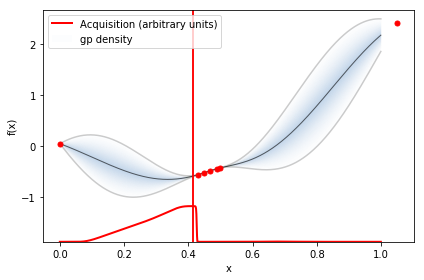

iteration  5


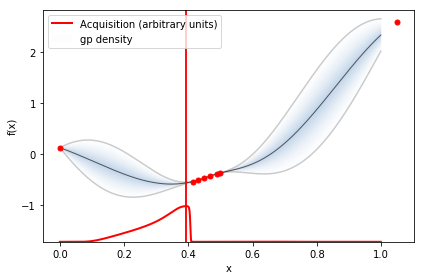

iteration  6


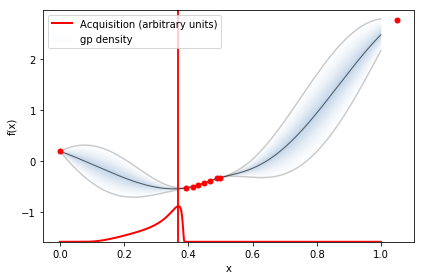

iteration  7


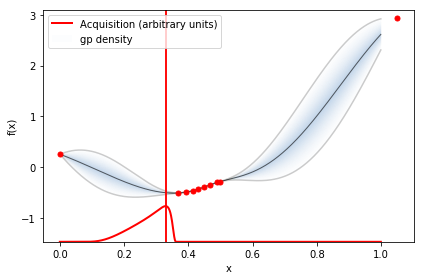

iteration  8


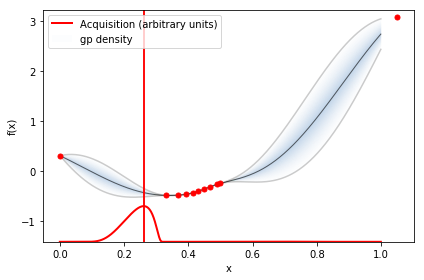

iteration  9


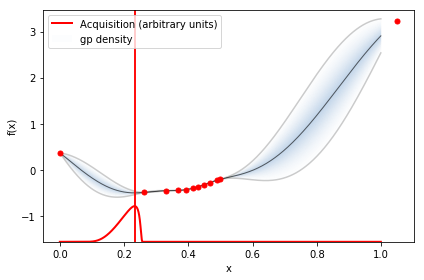

iteration  10


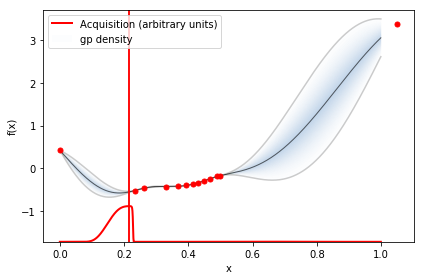

iteration  11


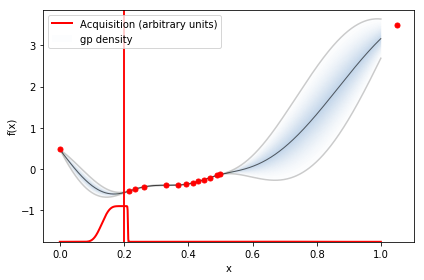

iteration  12


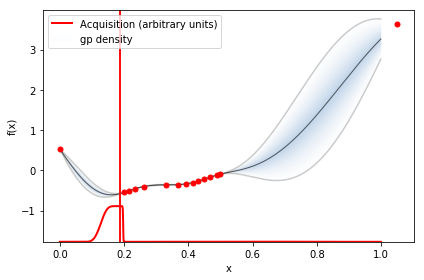

iteration  13


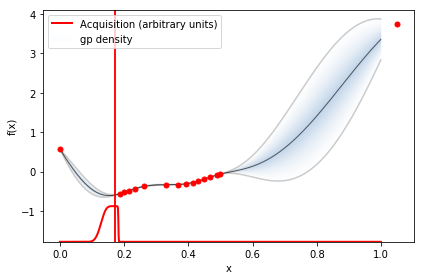

iteration  14


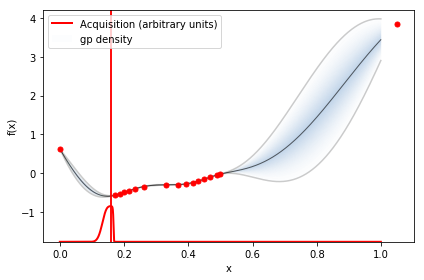

iteration  15


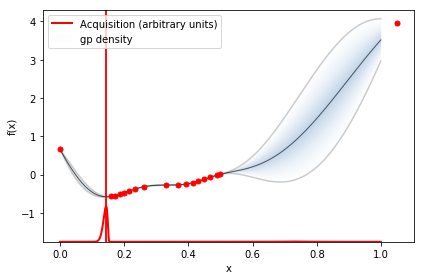

iteration  16


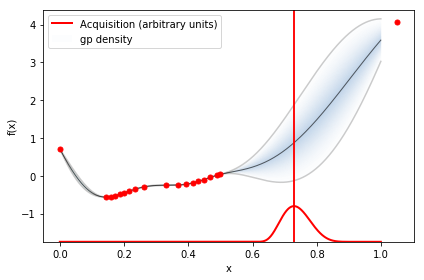

iteration  17


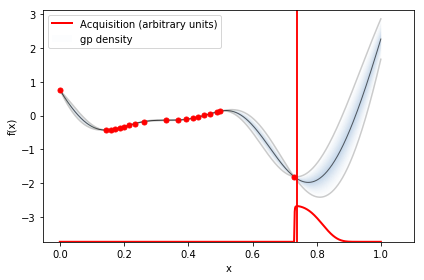

iteration  18


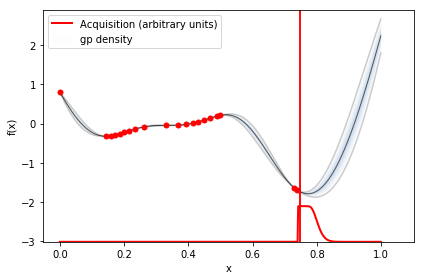

iteration  19


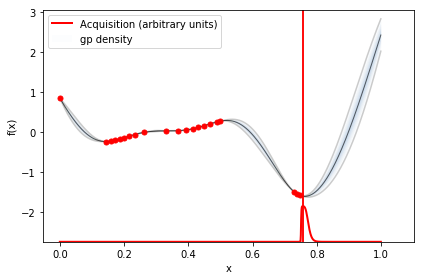

iteration  20


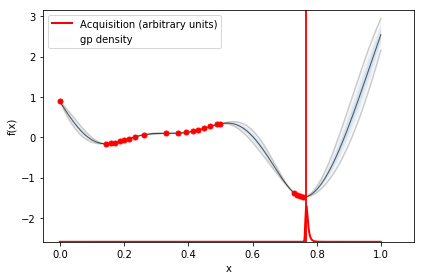

iteration  21


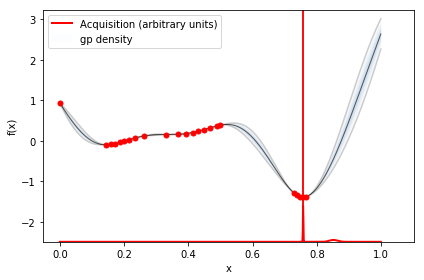

iteration  22


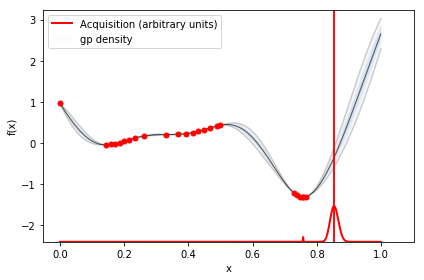

iteration  23


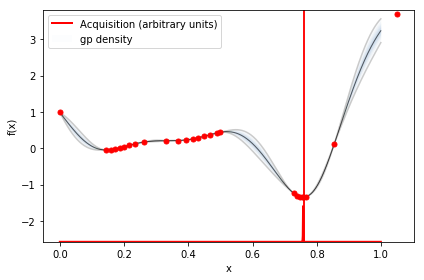

iteration  24


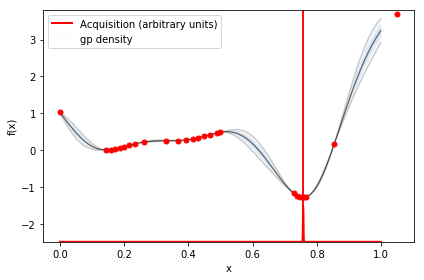

iteration  25


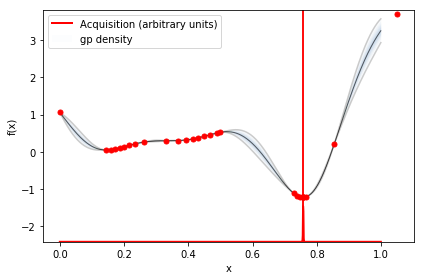

iteration  26


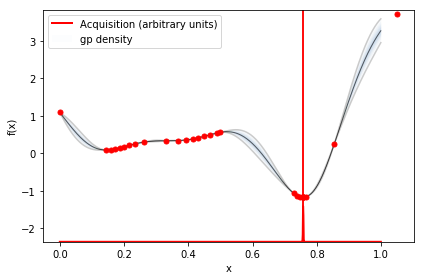

iteration  27


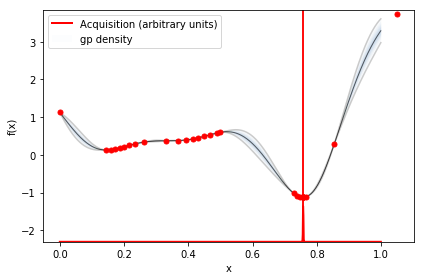

iteration  28


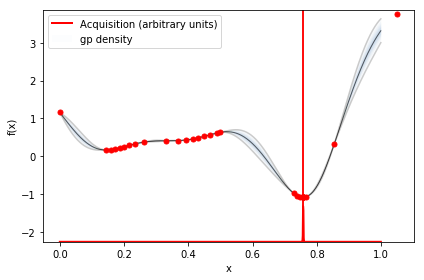

iteration  29


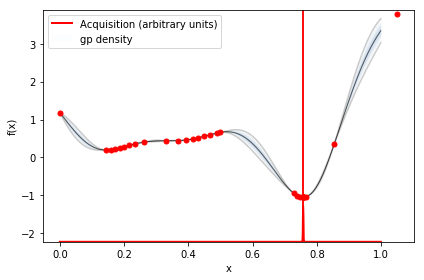

iteration  30


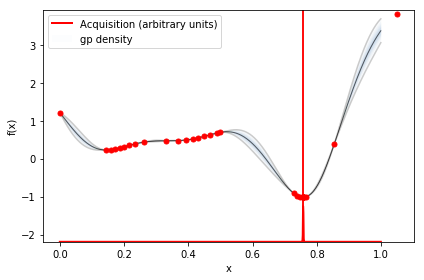

iteration  31


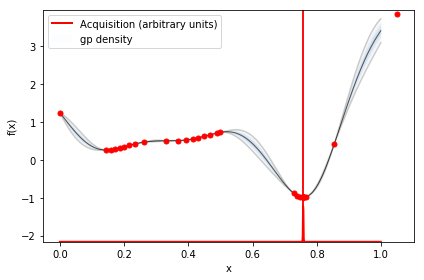

iteration  32


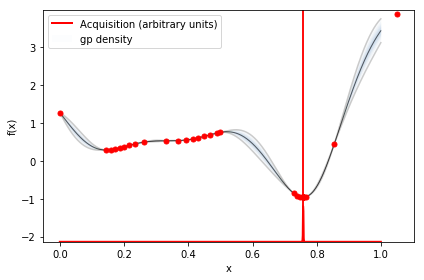

iteration  33


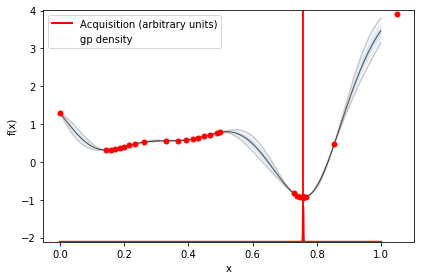

iteration  34


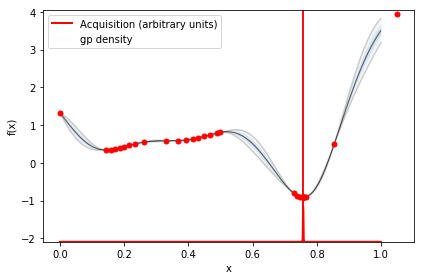

iteration  35


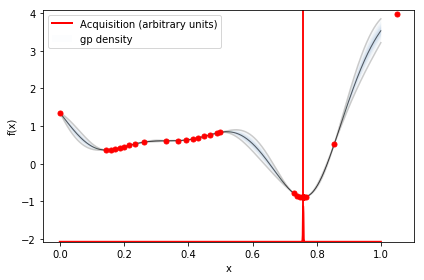

iteration  36


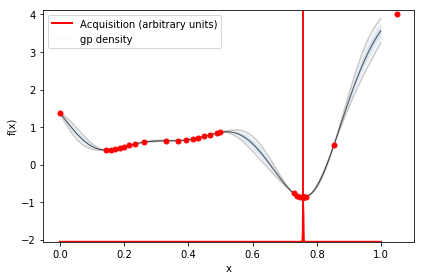

iteration  37


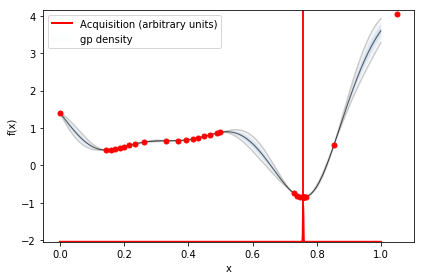

iteration  38


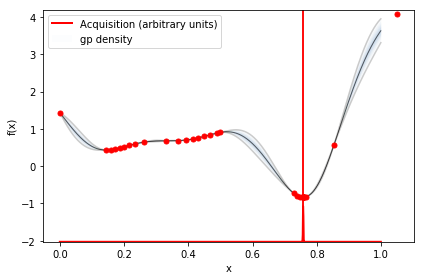

iteration  39


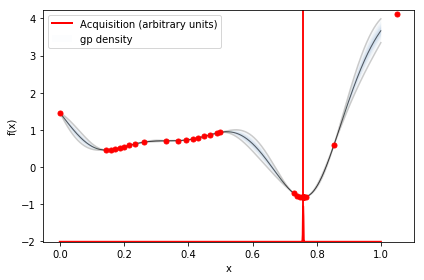

iteration  40


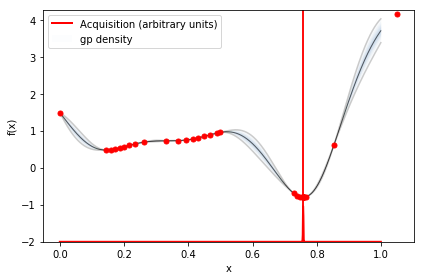

iteration  41


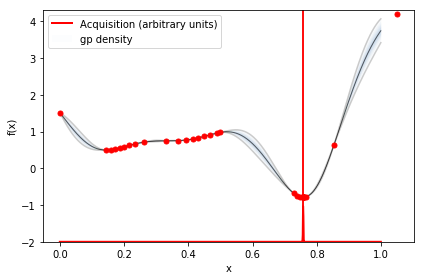

iteration  42


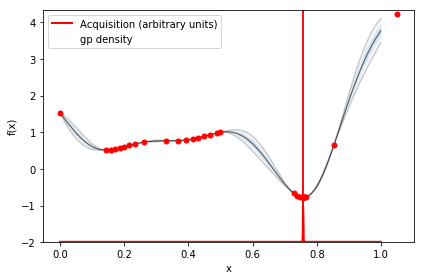

iteration  43


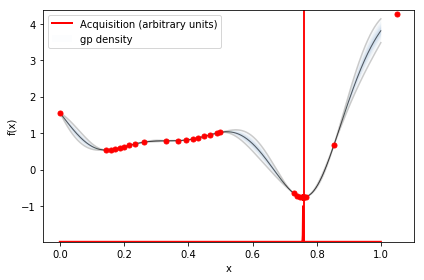

iteration  44


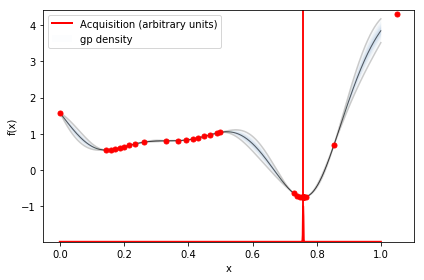

iteration  45


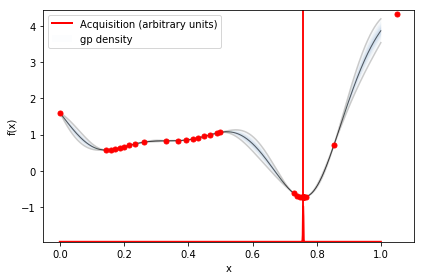

iteration  46


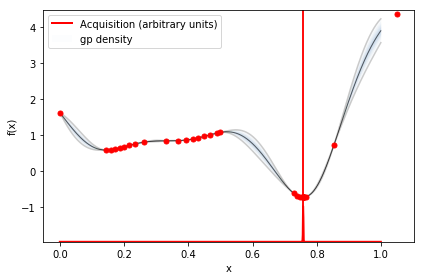

iteration  47


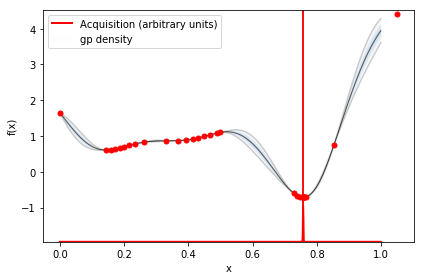

iteration  48


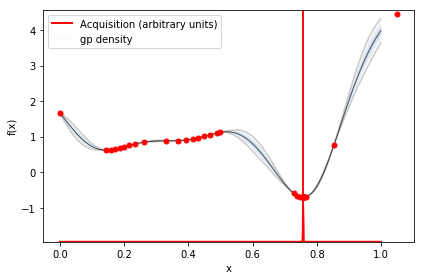

iteration  49


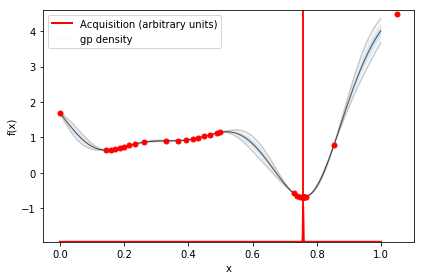

In [10]:
demo_acquisition(acquisition_type='MPI', max_iter = 50)